### Imports and Setup

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [121]:
data = pd.read_csv('data/dataset.csv')
description = pd.read_csv('data/description.csv')

data.head(2)

,id,age,monthly_income,collateral_value,loan_amount,city,state,collateral_debt,verified_restriction,dishonored_checks,...,pre_approved,form_completed,sent_to_analysis,channel,zip_code,landing_page,landing_page_product,gender,utm_term,education_level
0,100001025857,61.0,1300.0,NaN,10000.0,NaN,NaN,NaN,NaN,0,...,0.0,1.0,0.0,NaN,5754XXXX,NaN,NaN,male,NaN,NaN
1,173466,50.0,3500.0,40000.0,23936.0,Muriaé,MG,NaN,1.0,0,...,0.0,0.0,0.0,search,3688XXXX,/emprestimo/garantia-veiculo,AutoRefinancing,NaN,c,NaN


In [122]:
description

,id,Chave única de uma solicitação de cliente
0,age,Idade do cliente
1,monthly_income,Renda mensal informada pelo cliente no momento...
2,collateral_value,Valor do automóvel que será dado em garantia
3,loan_amount,Valor solicitado pelo cliente para empréstimo
4,city,Cidade do cliente
5,state,Estado do cliente
6,collateral_debt,Valor que o automovel do cliente tem de dívida...
7,verified_restriction,Indica se o cliente possui alguma restrição/pe...
8,dishonored_checks,Indica se o cliente possui cheques sem fundo
9,expired_debts,Indica se o cliente possui dívidas vencidas


In [123]:
data.describe()

,id,age,monthly_income,collateral_value,loan_amount,collateral_debt,verified_restriction,dishonored_checks,expired_debts,banking_debts,commercial_debts,protests,informed_restriction,loan_term,monthly_payment,auto_year,pre_approved,form_completed,sent_to_analysis
count,3.502100e+04,35019.000000,3.501900e+04,3.500000e+04,3.501800e+04,2.465000e+04,26329.000000,35021.000000,35021.000000,35021.000000,35021.000000,35021.000000,33371.000000,0.0,3.373900e+04,35017.000000,34848.000000,34846.000000,34848.000000
mean,3.000538e+06,38.325338,1.148942e+04,4.679727e+04,1.319529e+04,8.288322e+03,0.368225,0.034322,0.006082,0.162560,0.169584,0.046201,0.369303,NaN,6.711991e+02,2007.193335,0.430412,0.260546,0.093807
std,5.343669e+08,11.576323,2.614708e+05,8.918176e+05,1.238210e+05,2.824078e+05,0.482332,0.182058,0.077751,0.368969,0.375272,0.209923,0.482623,NaN,1.294930e+04,16.311349,0.495141,0.438939,0.291565
min,9.832600e+04,18.000000,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.332740e+05,30.000000,2.100000e+03,1.300000e+04,5.000000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.763600e+02,2004.000000,0.000000,0.000000,0.000000
50%,1.464430e+05,36.000000,3.200000e+03,2.000000e+04,9.900000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,4.367700e+02,2009.000000,0.000000,0.000000,0.000000
75%,1.601360e+05,46.000000,5.000000e+03,3.000000e+04,1.500000e+04,7.000000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,6.666700e+02,2012.000000,1.000000,1.000000,0.000000
max,1.000010e+11,116.000000,4.000400e+07,1.000000e+08,1.872000e+07,3.200000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,2.163889e+06,2017.000000,1.000000,1.000000,1.000000


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35021 entries, 0 to 35020
Data columns (total 32 columns):
id                      35021 non-null int64
age                     35019 non-null float64
monthly_income          35019 non-null float64
collateral_value        35000 non-null float64
loan_amount             35018 non-null float64
city                    34998 non-null object
state                   35017 non-null object
collateral_debt         24650 non-null float64
verified_restriction    26329 non-null float64
dishonored_checks       35021 non-null int64
expired_debts           35021 non-null int64
banking_debts           35021 non-null int64
commercial_debts        35021 non-null int64
protests                35021 non-null int64
marital_status          415 non-null object
informed_restriction    33371 non-null float64
loan_term               0 non-null float64
monthly_payment         33739 non-null float64
informed_purpose        33904 non-null object
auto_brand          

### Data Wrangling

<b>1. Primeiro separar os clientes que foram pré-aprovados dos que não foram.</b>

Deletar as observations 'pre_approved' quem tem como valor 'NaN', já que só podemos trabalhar com leads pré-aprovados de acordo com a regra de negócio.

In [125]:
data.dropna(subset=['pre_approved'], axis=0, inplace=True)

Verificar a nova quantidade de registros

In [126]:
data.shape[0]

34848

Verificar quantos leads foram pré-aprovados

In [127]:
data['pre_approved'].value_counts().to_frame(name="quantity")

,quantity
0.0,19849
1.0,14999


Separar os leads pré-aprovados dos que não foram

In [128]:
pre_approved_leads = data.loc[data.pre_approved != 0]

print('Leads pré-aprovados: ', pre_approved_leads.shape[0])

Leads pré-aprovados:  14999


<b>2. Verificar missing data</b>

Pelo fluxo de cadastro do lead no site da Creditas, os atributos que não podem estar como nulo são: 'age', 'montlhy_income', 'loan-amount', 'city', 'state'. Dado que o preenchimento no site é obrigatório.

In [129]:
pre_approved_leads.isnull().sum().to_frame('missing data qtd')

,missing data qtd
id,0
age,0
monthly_income,0
collateral_value,13
loan_amount,0
city,8
state,0
collateral_debt,5307
verified_restriction,64
dishonored_checks,0


- age': Não possui nenhum registro como nulo
- 'montlhy_income': Não possui nenhum registro  como nulo
- 'loan_amount': Não possui nenhum registro  como nulo
- 'city': Possui 8 registro como nulo, mas como esse atributo parece ser de menor importância dado que possuímos o 'state' sem nenhum registro nulo, então não precisamos nos preocupar por enquanto com city e podemos excluir essa feature.
- 'state': Não possui entry como nulo

In [130]:
pre_approved_leads.drop(['city'], axis=1, inplace=True)
pre_approved_leads.drop(['id'], axis=1, inplace=True)
pre_approved_leads.drop(['loan_term'], axis=1, inplace=True)
pre_approved_leads.drop(['landing_page'], axis=1, inplace=True)
pre_approved_leads.drop(['landing_page_product'], axis=1, inplace=True)

- Um atributo que chamam atenção que está como nulo e que aparenta ser importante para a criação do modelo é o 'collateral_value'.
Podemos resolver substituindo pela média dos valores do 'collateral_value'.


In [141]:
average_collateral_value = pre_approved_leads['collateral_value'].mean()
pre_approved_leads['collateral_value'].replace(np.nan, average_collateral_value, inplace=True)

average_collateral_debt = pre_approved_leads['collateral_debt'].mean()
pre_approved_leads['collateral_debt'].replace(np.nan, average_collateral_debt, inplace=True)

mode_verified_restriction = pre_approved_leads['verified_restriction'].mode()
pre_approved_leads['verified_restriction'].replace(np.nan, mode_verified_restriction[0], inplace=True)

pre_approved_leads['marital_status'].replace(np.nan,'not_informed', inplace=True)

mode_informed_restriction = pre_approved_leads['informed_restriction'].mode()
pre_approved_leads['informed_restriction'].replace(np.nan, mode_informed_restriction[0], inplace=True)

average_monthly_payment = pre_approved_leads['monthly_payment'].mean()
pre_approved_leads['monthly_payment'].replace(np.nan, average_monthly_payment, inplace=True)

mode_informed_restriction = pre_approved_leads['informed_restriction'].mode()
pre_approved_leads['informed_restriction'].replace(np.nan, mode_informed_restriction[0], inplace=True)

mode_auto_model = pre_approved_leads['auto_model'].mode()
pre_approved_leads['auto_model'].replace(np.nan, mode_auto_model[0], inplace=True)

pre_approved_leads['informed_purpose'].replace(np.nan,'not_informed', inplace=True)

mode_channel = pre_approved_leads['channel'].mode()
pre_approved_leads['channel'].replace(np.nan, mode_channel[0], inplace=True)

pre_approved_leads['education_level'].replace(np.nan,'not_informed', inplace=True)

In [142]:
pre_approved_leads.isnull().sum().to_frame('missing data qtd')

,missing data qtd
age,0
monthly_income,0
collateral_value,0
loan_amount,0
state,0
collateral_debt,0
verified_restriction,0
dishonored_checks,0
expired_debts,0
banking_debts,0


Observação: Algumas features possuem não possuem valor, acredito que foi pelo motivo do cliente não preencher a ficha completa ou por algum erro de sistema. 

De qualquer forma a análise de cada uma dessas features será feita de forma individual na EDA para entender sua relação com  o 'sent_to_analysis'

<b>3. Verificar tipo de atributos</b>

In [133]:
pre_approved_leads.dtypes

age                     float64
monthly_income          float64
collateral_value        float64
loan_amount             float64
state                    object
collateral_debt         float64
verified_restriction    float64
dishonored_checks         int64
expired_debts             int64
banking_debts             int64
commercial_debts          int64
protests                  int64
marital_status           object
informed_restriction    float64
monthly_payment         float64
informed_purpose         object
auto_brand               object
auto_model               object
auto_year               float64
pre_approved            float64
form_completed          float64
sent_to_analysis        float64
channel                  object
zip_code                 object
gender                   object
utm_term                 object
education_level          object
dtype: object

Poderiamos trocar o tipo do 'zip_code' de 'object' para 'int64', acredito que os últimos digitos foram ocultados para preservar informações dos clientes.
- Trocar 'age' de 'float64' para 'int'
- Trocar 'verified_restriction' de 'float64' para 'int'
- Trocar 'informed_restriction' de 'float64' para 'int'
- Trocar 'pre_approved' de 'float64' para 'int'
- Trocar 'form_completed' de 'float64' para 'int'
- Trocar 'sent_to_analysis' de 'float64' para 'int'

In [134]:
pre_approved_leads[['sent_to_analysis']] = pre_approved_leads[['sent_to_analysis']].astype("int")
pre_approved_leads[['age']] = pre_approved_leads[['age']].astype("int")
pre_approved_leads[['pre_approved']] = pre_approved_leads[['pre_approved']].astype("int")
pre_approved_leads[['form_completed']] = pre_approved_leads[['form_completed']].astype("int")

<b>4. Detecção e Remoção de Outliers</b>

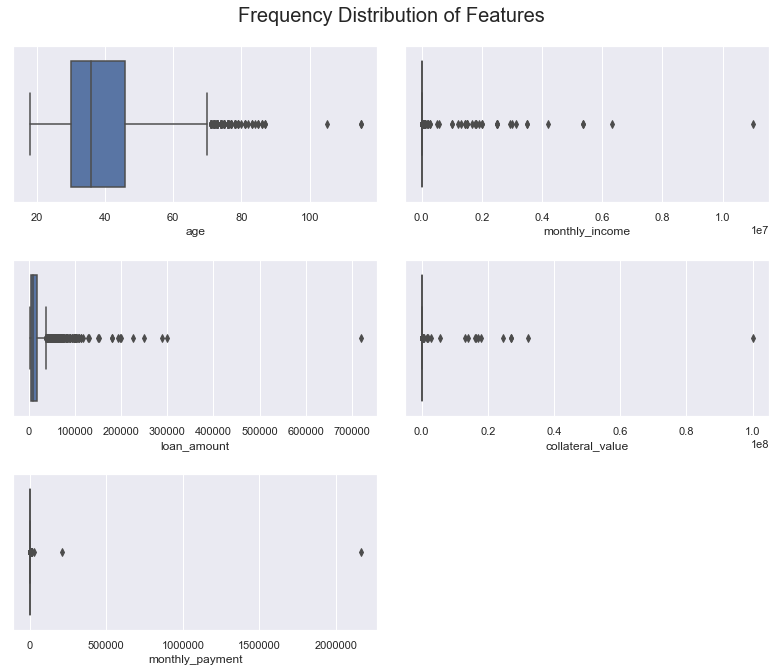

In [135]:
fig = plt.figure(figsize=(12, 10))
fig.suptitle('Frequency Distribution of Features',fontsize=20)

ax1 = fig.add_subplot(3, 2, 1)
sns.boxplot(pre_approved_leads['age']);

fig.add_subplot(3, 2, 2, sharey=ax1)
sns.boxplot(pre_approved_leads['monthly_income'])

fig.add_subplot(3, 2, 3, sharey=ax1)
sns.boxplot(pre_approved_leads['loan_amount']);

fig.add_subplot(3, 2, 4, sharey=ax1)
sns.boxplot(pre_approved_leads['collateral_value'])

fig.add_subplot(3, 2, 5, sharey=ax1)
sns.boxplot(pre_approved_leads['monthly_payment'])

plt.tight_layout(pad=4, w_pad=1, h_pad=1.5)
plt.show()

In [136]:
features = ['monthly_income', 'age', 'loan_amount', 'collateral_value', 'monthly_payment']
not_selected = pd.DataFrame()

for x in features:
    Q1 = pre_approved_leads[x].quantile(0.25)
    Q3 = pre_approved_leads[x].quantile(0.75)
    IIQ = Q3 - Q1
    upper_boundary = Q1 - 1.5 * IIQ
    lower_boundary = Q3 + 1.5 * IIQ
    selection = (pre_approved_leads[x] >= upper_boundary) & (pre_approved_leads[x] <= lower_boundary)
    pre_approved_leads = pre_approved_leads[selection]

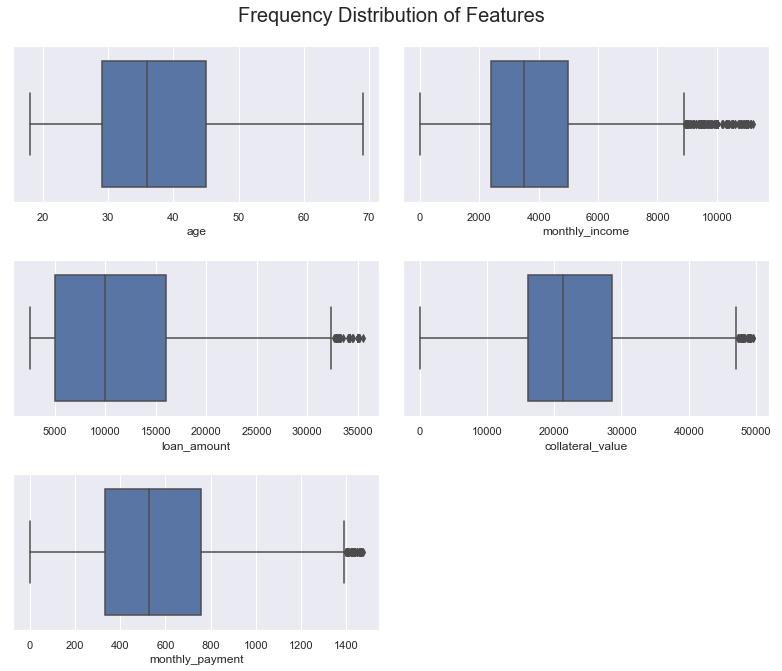

In [137]:
fig = plt.figure(figsize=(12, 10))
fig.suptitle('Frequency Distribution of Features',fontsize=20)

ax1 = fig.add_subplot(3, 2, 1)
sns.boxplot(pre_approved_leads['age']);

fig.add_subplot(3, 2, 2, sharey=ax1)
sns.boxplot(pre_approved_leads['monthly_income'])

fig.add_subplot(3, 2, 3, sharey=ax1)
sns.boxplot(pre_approved_leads['loan_amount']);

fig.add_subplot(3, 2, 4, sharey=ax1)
sns.boxplot(pre_approved_leads['collateral_value'])

fig.add_subplot(3, 2, 5, sharey=ax1)
sns.boxplot(pre_approved_leads['monthly_payment'])

plt.tight_layout(pad=4, w_pad=1, h_pad=1.5)
plt.show()

### Export clean data

In [138]:
pre_approved_leads.to_csv('data/clean_data.csv', index=False)

In [139]:
pre_approved_leads.head()

,age,monthly_income,collateral_value,loan_amount,state,collateral_debt,verified_restriction,dishonored_checks,expired_debts,banking_debts,...,auto_model,auto_year,pre_approved,form_completed,sent_to_analysis,channel,zip_code,gender,utm_term,education_level
7,52,5668.0,24000.0,5000.0,SP,900.0,0.0,0,0,0,...,LIVINA 1.6 16V Flex Fuel 5p,2011.0,1,0,0,search,4028XXXX,female,NaN,"Ensino médio completo (antigo 2º grau, secundá..."
11,20,5000.0,14200.0,5000.0,SP,1500.0,0.0,0,0,0,...,Fox City 1.0Mi/ 1.0Mi Total Flex 8V 3p,2004.0,1,0,0,direct,7060XXXX,male,NaN,"Ensino médio completo (antigo 2º grau, secundá..."
13,48,3000.0,17000.0,8000.0,AM,1060.0,0.0,0,0,0,...,Palio 1.0 ECONOMY Fire Flex 8V 4p,2010.0,1,0,0,affiliates,6906XXXX,male,NaN,Educação superior completa
18,56,7500.0,21000.0,12000.0,BA,0.0,1.0,0,0,0,...,Classic/ Classic LS 1.0 VHC FlexPower 4p,2012.0,1,0,0,social,4536XXXX,male,NaN,not_informed
22,35,3379.0,16500.0,5000.0,SP,0.0,0.0,0,0,0,...,Celta Life/ LS 1.0 MPFI 8V FlexPower 5p,2008.0,1,0,0,search,8588XXXX,male,NaN,"Ensino médio completo (antigo 2º grau, secundá..."
